In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1) 데이터 불러오기

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DataMining/HW7/(34-data B) titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2) EDA

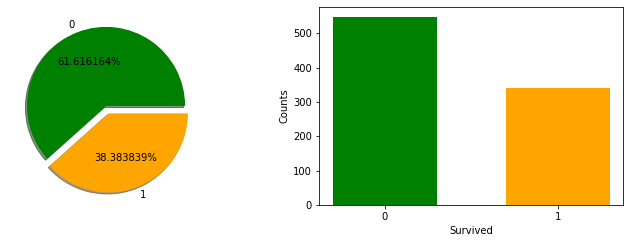

In [ ]:
# target 비율

count_0 = df[df['Survived'] == 0]['Survived'].count()
count_1 = df[df['Survived'] == 1]['Survived'].count()
pie_value = [count_0, count_1]
pie_labels = ['0', '1']
colors = ['green', 'orange']

fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(221)
plt.pie(pie_value, labels = pie_labels, autopct = '%1f%%', startangle = 0, shadow = True, explode = [0,0.1], colors = colors) # 사망자 비율

ax2 = fig.add_subplot(222)
rects = plt.bar(pie_labels, pie_value, color = colors, width = 0.6) # 사망자 수
plt.xlabel('Survived')
plt.ylabel('Counts')

plt.show()

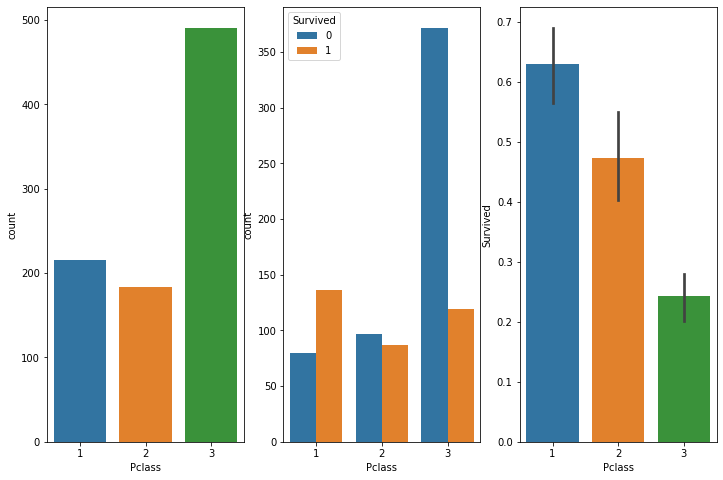

In [ ]:
# Pclass vs Survived
fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(1,3,1) 
sns.countplot(x = 'Pclass', data = df, ax = ax1) # class별 승객수

ax2 = fig.add_subplot(1,3,2) 
sns.countplot(x = 'Pclass', hue = 'Survived', data = df,ax = ax2) # class별 생존자 수

ax3 = fig.add_subplot(1,3,3) 
sns.barplot(x = 'Pclass', y = 'Survived', data = df, ax = ax3) # class별 생존율

plt.show()
 
# 사망한 사람의 비율 Pclass 3 에서 가장 높음. 

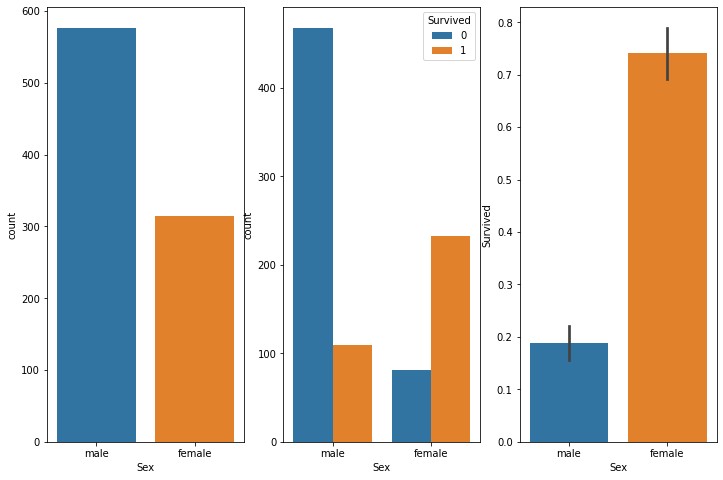

In [ ]:
# Sex vs Survived

fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(1,3,1) 
sns.countplot(x = 'Sex', data = df, ax = ax1) # sex별 승객수

ax2 = fig.add_subplot(1,3,2) 
sns.countplot(x = 'Sex', hue = 'Survived', data = df,ax = ax2) # sex별 생존자 수

ax3 = fig.add_subplot(1,3,3) 
sns.barplot(x = 'Sex', y = 'Survived', data = df, ax = ax3) # sex별 생존율

plt.show()

# 남자 승객의 사망률이 높음. 

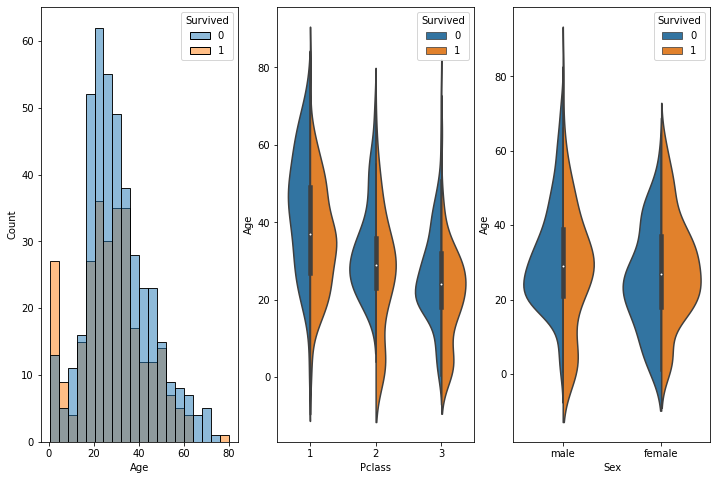

In [ ]:
# Age vs Survived

fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(1,3,1) 
sns.histplot(x = 'Age', hue = 'Survived', data = df,ax = ax1) # 나이별 생존 승객 수

ax2 = fig.add_subplot(1,3,2) 
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df, split=True, ax = ax2)

ax3 = fig.add_subplot(1,3,3) 
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df, split=True, ax = ax3)

plt.show()

# 나이 어릴수록 생존율 높음. 

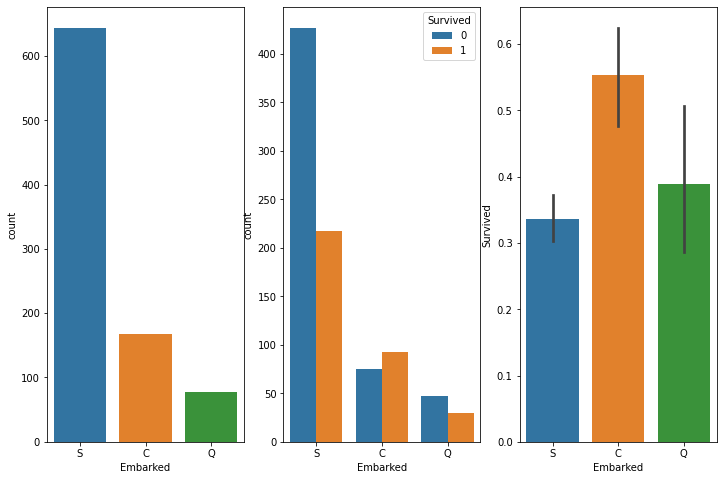

In [ ]:
# Embarked vs Survived
fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(1,3,1) 
sns.countplot(x = 'Embarked', data = df, ax = ax1) # Embarked별 승객수

ax2 = fig.add_subplot(1,3,2) 
sns.countplot(x = 'Embarked', hue = 'Survived', data = df,ax = ax2) # Embarked별 생존자 수

ax3 = fig.add_subplot(1,3,3) 
sns.barplot(x = 'Embarked', y = 'Survived', data = df, ax = ax3) # Embarked별 생존율

plt.show()

# C의 생존율 높음. 

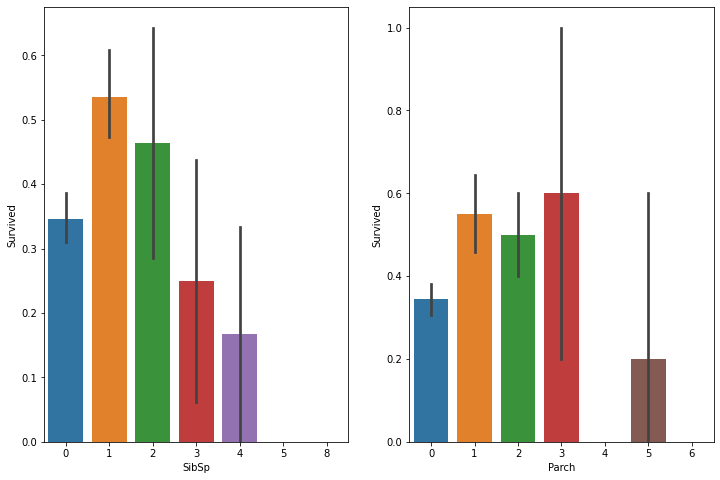

In [ ]:
# SibSp/Parch vs Survived

fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(1,2,1) 
sns.barplot(x = 'SibSp', y = 'Survived', data = df, ax = ax1) # SibSp별 생존율

ax2 = fig.add_subplot(1,2,2) 
sns.barplot(x = 'Parch', y = 'Survived', data = df, ax = ax2) # Parch별 생존율

plt.show()

# 동승자 0명일 때보다 1,2,3명일 때 생존율 높음. 

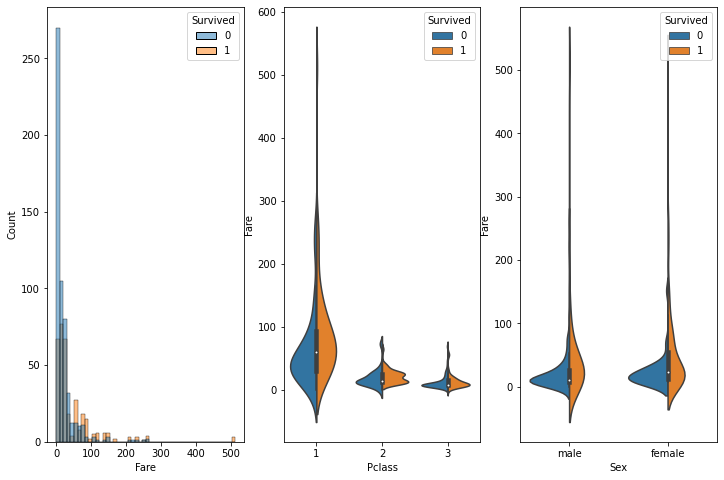

In [ ]:
# Fare vs Survived

fig = plt.figure(figsize = (12,8))

ax1 = fig.add_subplot(1,3,1) 
sns.histplot(x = 'Fare', hue = 'Survived', data = df,ax = ax1, bins = 50)

ax2 = fig.add_subplot(1,3,2) 
sns.violinplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = df, split=True, ax = ax2)

ax3 = fig.add_subplot(1,3,3) 
sns.violinplot(x = 'Sex', y = 'Fare', hue = 'Survived', data = df, split=True, ax = ax3)

plt.show()

# 분포가 넓음. pclass와 연관이 큼.

# 3) 데이터 전처리

In [ ]:
# Name에서 직함 뽑아내서 분류
df.loc[df['Name'].str.contains('Mrs'), 'Name'] = 'M_rs'
df.loc[df['Name'].str.contains('Mr'), 'Name'] = 'Mr'
df.loc[df['Name'].str.contains('Miss'), 'Name'] = 'Miss'
df.loc[df['Name'].str.contains('Master'), 'Name'] = 'Master'
df.loc[df['Name'].str.contains('Dr'), 'Name'] = 'Dr'
df.loc[df['Name'].str.contains('M_rs|Mr|Miss|Master|Dr') == False, 'Name'] = 'Other'

In [ ]:
# 직함 그룹별 평균값으로 나이 null값 대체
df['Age'] = df.groupby(['Name'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Embarked Null값 처리 - S로 대체
df['Embarked'] = df['Embarked'].fillna('S')

In [ ]:
# 범주형 변수인 Pclass, Sex에 대해 one-hot encoding 진행
df = pd.get_dummies(data = df, columns = ['Embarked', 'Sex'], prefix = ['Embarked', 'Sex'])

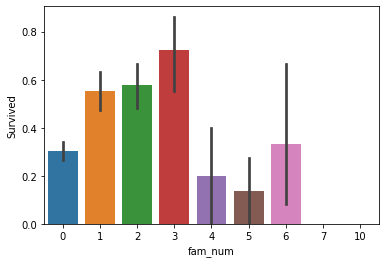

In [ ]:
# Sibsp, Parch를 하나의 column으로 통합
df['fam_num'] = df['SibSp'] + df['Parch']
sns.barplot(x = 'fam_num', y = 'Survived', data = df) 
plt.show() # 마찬가지의 경향 그대로 보임. 

In [ ]:
# 필요 없는 column drop
df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket', 'Sex_male'], axis = 1, inplace = True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,fam_num
0,0,3,22.000000,1,0,7.2500,0,0,1,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,1,1
2,1,3,26.000000,0,0,7.9250,0,0,1,1,0
3,1,1,35.000000,1,0,53.1000,0,0,1,1,1
4,0,3,35.000000,0,0,8.0500,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,0,1,0,0
887,1,1,19.000000,0,0,30.0000,0,0,1,1,0
888,0,3,21.777778,1,2,23.4500,0,0,1,1,3
889,1,1,26.000000,0,0,30.0000,1,0,0,0,0


In [ ]:
df.isnull().sum() # null값 존재 x

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_female    0
fam_num       0
dtype: int64

# 4) 모델 학습

## 4.1) train test split

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,fam_num
0,0,3,22.000000,1,0,7.2500,0,0,1,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,1,1
2,1,3,26.000000,0,0,7.9250,0,0,1,1,0
3,1,1,35.000000,1,0,53.1000,0,0,1,1,1
4,0,3,35.000000,0,0,8.0500,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,0,1,0,0
887,1,1,19.000000,0,0,30.0000,0,0,1,1,0
888,0,3,21.777778,1,2,23.4500,0,0,1,1,3
889,1,1,26.000000,0,0,30.0000,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived', axis = 1), df[['Survived']], test_size=0.2, random_state = 2022)

In [ ]:
print(len(x_train))
print(len(x_test))

712
179


## 4.2) k-means clustering

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
# confusion matrix plot 함수
def show_confusion_matrix(y_test, y_pred):
  sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, fmt = 'd', cmap = 'Blues')
  plt.ylabel('true')
  plt.xlabel('pred')
  plt.show() 

Accuracy: 0.6480446927374302


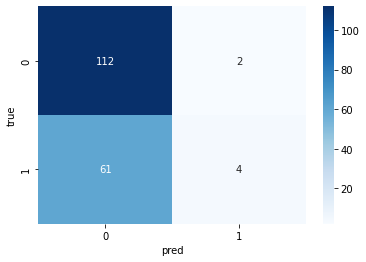

In [ ]:
# 기본 모델
pipeline = Pipeline([('clf', KMeans(n_clusters=2, random_state = 2022))])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
if y_pred.mean() > 0.5 : y_pred = abs(y_pred-1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

### scaling 시도

Accuracy: 0.6312849162011173


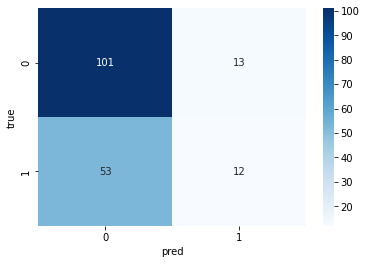

In [ ]:
# StandardScaler
pipeline = Pipeline([('scaler',StandardScaler()), ('clf', KMeans(n_clusters=2, random_state = 2022))])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
if y_pred.mean() > 0.5 : y_pred = abs(y_pred-1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

Accuracy: 0.6536312849162011


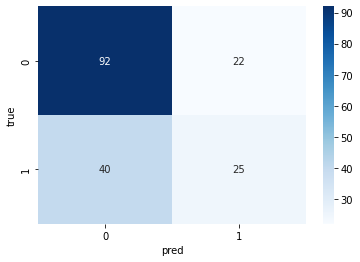

In [ ]:
# MinMaxScaler
pipeline = Pipeline([('scaler',MinMaxScaler()), ('clf',KMeans(n_clusters=2, random_state = 2022))])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
if y_pred.mean() > 0.5 : y_pred = abs(y_pred-1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

Accuracy: 0.6536312849162011


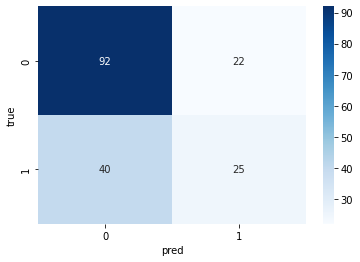

In [ ]:
# MinMaxScaler
pipeline = Pipeline([('scaler',MinMaxScaler()), ('clf',KMeans(n_clusters=2, random_state = 2022))])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
if y_pred.mean() > 0.5 : y_pred = abs(y_pred-1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

accuracy 정리
- scaling 진행 전 : 0.64
- StandardScaling : 0.63
- MinMaxScaling : 0.65

  => scaling을 진행하고 다시 모델을 적합시켜본 결과, MinMaxScaling을 진행하였을 때 가장 성능이 높았다.

### oversampling 시도

In [ ]:
# oversampling
from imblearn.over_sampling import RandomOverSampler
x_samp, y_samp = RandomOverSampler(random_state=0).fit_resample(x_train, y_train)

Accuracy: 0.6536312849162011


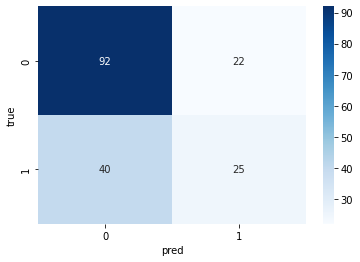

In [ ]:
pipeline = Pipeline([('scaler',MinMaxScaler()), ('clf', KMeans(n_clusters=2, random_state = 2022))])

pipeline.fit(x_samp, y_samp)
y_pred = pipeline.predict(x_test)
if y_pred.mean() > 0.5 : y_pred = abs(y_pred-1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

- oversampling을 진행하기 전과 비교하여 동일한 성능을 갖는 것을 보아, oversampling을 진행하지 않아도 충분히 clustering이 진행되는 것으로 보인다. 

### feature 선택

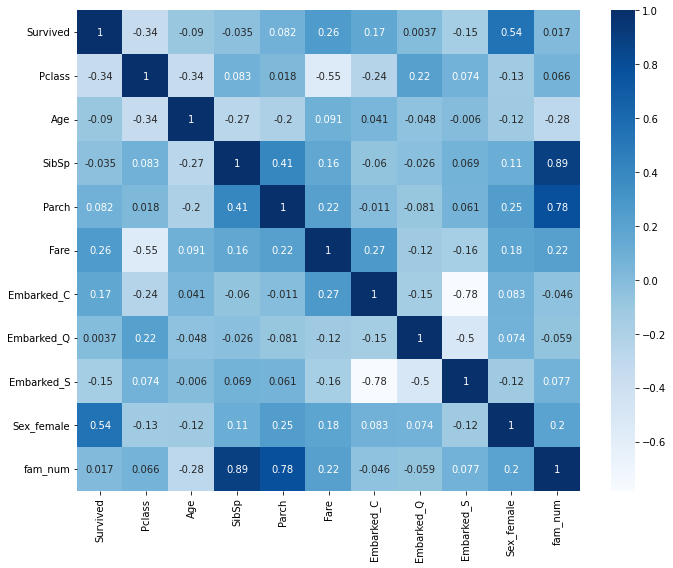

In [ ]:
# Survived와 correlation이 높은 feature를 선택해보고자 함.
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')
plt.tight_layout()

Accuracy: 0.7932960893854749


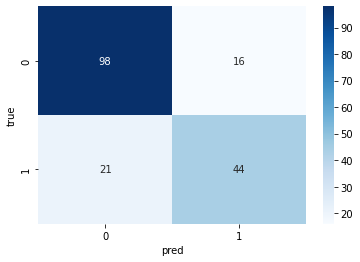

In [ ]:
# Pclass, Fare, Embarked_C, Sex_Female 선택
pipeline = Pipeline([('scaler',MinMaxScaler()), ('clf', KMeans(n_clusters=2, random_state = 2022))])

pipeline.fit(x_train[['Pclass', 'Fare', 'Embarked_C', 'Sex_female']], y_train)
y_pred = pipeline.predict(x_test[['Pclass', 'Fare', 'Embarked_C', 'Sex_female']])
if y_pred.mean() > 0.5 : y_pred = abs(y_pred-1)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

- accuracy가 0.79로 성능이 향상됐다

In [ ]:
# 모든 feature 조합에 대해 실험
from itertools import combinations
pipeline = Pipeline([('scaler',MinMaxScaler()), ('clf',KMeans(n_clusters=2, random_state = 2022))])

feature_list = x_train.columns
result=[]

for i in range(1,len(feature_list)+1):
    c=combinations(feature_list,i)
    result.extend(c)

score_df = pd.DataFrame(columns = ['score', 'feature'])

for r in result:
  pipeline.fit(x_train[list(r)], y_train)
  y_pred = pipeline.predict(x_test[list(r)])
  if y_pred.mean() > 0.5 : y_pred = abs(y_pred-1)
  
  acc = metrics.accuracy_score(y_test, y_pred)
  score_df = score_df.append({'score' : acc , 'feature' : list(r)} , ignore_index=True)

In [ ]:
score_df['feature_count'] = score_df['feature'].apply(lambda x:len(x))
score_df.sort_values(['score', 'feature_count'], ascending = [False, True]).head(10)

,score,feature,feature_count
8,0.793296,[Sex_female],1
17,0.793296,"[Pclass, Sex_female]",2
25,0.793296,"[Age, Sex_female]",2
32,0.793296,"[SibSp, Sex_female]",2
38,0.793296,"[Parch, Sex_female]",2
43,0.793296,"[Fare, Sex_female]",2
47,0.793296,"[Embarked_C, Sex_female]",2
50,0.793296,"[Embarked_Q, Sex_female]",2
52,0.793296,"[Embarked_S, Sex_female]",2
54,0.793296,"[Sex_female, fam_num]",2


- 모든 feature 조합에 대해 실험해본 결과, Sex_female(성별 정보)만으로 최고 성능을 내는 것으로 보인다. 

## 4.3) Decision Tree

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree
from sklearn import metrics

Accuracy: 0.7877094972067039


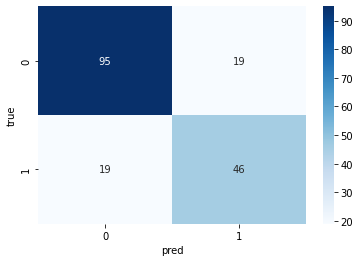

In [ ]:
# 기본 모델
pipeline = Pipeline([('clf', tree.DecisionTreeClassifier(random_state=2022))])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

### scaling 시도

Accuracy: 0.7877094972067039


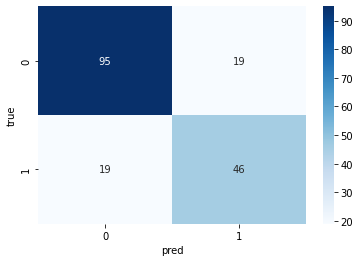

In [ ]:
# StandardScaler
pipeline = Pipeline([('scaler',StandardScaler()), ('clf', tree.DecisionTreeClassifier(random_state=2022))])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

Accuracy: 0.7877094972067039


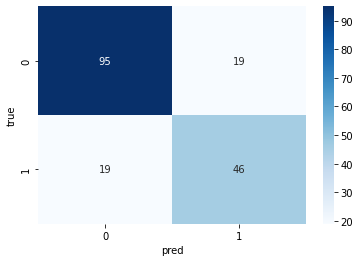

In [ ]:
# MinMaxScaler
pipeline = Pipeline([('scaler',MinMaxScaler()), ('clf', tree.DecisionTreeClassifier(random_state=2022))])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

accuracy 정리
- scaling 진행 전 : 0.78
- StandardScaling : 0.78
- MinMaxScaling : 0.78

  => tree 계열 모델은 scale에 큰 영향을 받지 않기 때문에 scaling을 진행하지 않고 이후 과정을 진행하였다.

### oversampling 시도

In [ ]:
# oversampling
from imblearn.over_sampling import RandomOverSampler
x_samp, y_samp = RandomOverSampler(random_state=0).fit_resample(x_train, y_train)

Accuracy: 0.7541899441340782


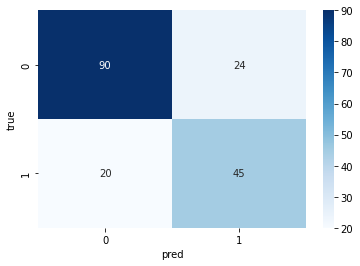

In [ ]:
pipeline = Pipeline([('clf', tree.DecisionTreeClassifier(random_state=2022))])

pipeline.fit(x_samp, y_samp)
y_pred = pipeline.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

- oversampling을 진행하기 전과 비교하여 오히려 성능이 떨어졌다. 

### feature 선택

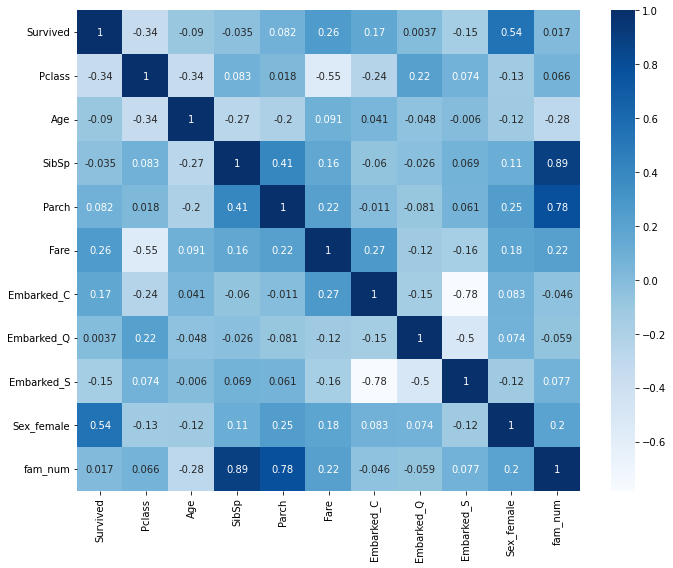

In [ ]:
# Survived와 correlation이 높은 feature를 선택해보고자 함.
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')
plt.tight_layout()

Accuracy: 0.8212290502793296


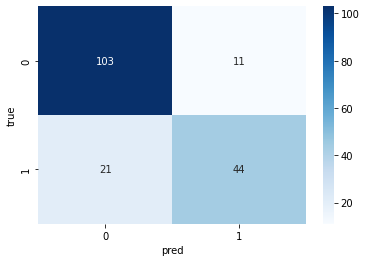

In [ ]:
# Pclass, Fare, Embarked_C, Sex_Female 선택
pipeline = Pipeline([('clf', tree.DecisionTreeClassifier(random_state=2022))])

pipeline.fit(x_train[['Pclass', 'Fare', 'Embarked_C', 'Sex_female']], y_train)
y_pred = pipeline.predict(x_test[['Pclass', 'Fare', 'Embarked_C', 'Sex_female']])

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

- 중요 feature를 선택한 결과, 성능이 0.82로 향상됐다.

In [ ]:
# 모든 feature 조합에 대해 실험
from itertools import combinations
pipeline = Pipeline([('clf', tree.DecisionTreeClassifier(random_state=2022))])

feature_list = x_train.columns
result=[]

for i in range(1,len(feature_list)+1):
    c=combinations(feature_list,i)
    result.extend(c)

score_df = pd.DataFrame(columns = ['score', 'feature'])

for r in result:
  pipeline.fit(x_train[list(r)], y_train)
  y_pred = pipeline.predict(x_test[list(r)])
  
  acc = metrics.accuracy_score(y_test, y_pred)
  score_df = score_df.append({'score' : acc , 'feature' : list(r)} , ignore_index=True)

In [ ]:
score_df['feature_count'] = score_df['feature'].apply(lambda x:len(x))
score_df.sort_values(['score', 'feature_count'], ascending = [False, True]).head(10)

,score,feature,feature_count
244,0.837989,"[Pclass, Fare, Embarked_Q, Sex_female]",4
79,0.832402,"[Pclass, Fare, Sex_female]",3
481,0.832402,"[Pclass, Parch, Fare, Embarked_Q, Sex_female]",5
497,0.826816,"[Pclass, Fare, Embarked_C, Embarked_Q, Sex_fem...",5
757,0.826816,"[Pclass, Fare, Embarked_C, Embarked_Q, Embarke...",6
160,0.821229,"[Fare, Embarked_Q, Sex_female]",3
200,0.821229,"[Pclass, Age, Embarked_S, Sex_female]",4
212,0.821229,"[Pclass, SibSp, Fare, Sex_female]",4
227,0.821229,"[Pclass, Parch, Fare, Sex_female]",4
241,0.821229,"[Pclass, Fare, Embarked_C, Sex_female]",4


- 위에서 중요 feature일 것으로 예상한 pclass, fare, sex, embarked 관련 변수를 선택할 때 높은 성능을 내는 것으로 보인다. 

### Hyperparameter tuning by GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 
    "criterion" : ["gini", "entropy"], 
    "max_depth" : [2, 4, 5, 6, 7, 8, 10, 15, 50, 100],
    "min_samples_leaf" : [1, 2, 4, 6, 8, 10]
}

dt = tree.DecisionTreeClassifier(random_state = 2022)
gs_dt = GridSearchCV(dt, param_grid=params) 
gs_dt.fit(x_train[['Pclass', 'Fare', 'Embarked_Q', 'Sex_female']], y_train) 

print("best param : {}".format(gs_dt.best_params_)) 

best param : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}


Accuracy: 0.8100558659217877


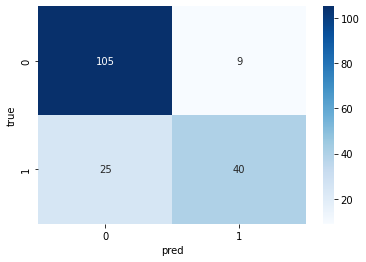

In [ ]:
# GridSearch 결과
dt_best = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5,  min_samples_leaf = 10, random_state = 2022)
dt_best.fit(x_train[['Pclass', 'Fare', 'Embarked_Q', 'Sex_female']], y_train)

y_pred = dt_best.predict(x_test[['Pclass', 'Fare', 'Embarked_Q', 'Sex_female']])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
show_confusion_matrix(y_test, y_pred)

- gridsearch 결과 나온 parameter를 넣어서 적합했을 때, 기존보다 accuracy가 낮아졌다. 

# 5) 정리

- 모델링 진행 방법
  - trian set에 대하여, **scaling, oversampling, feature 선정, hyperparameter tuning(dt)**를 진행해보며 성능을 좋은 모델을 만들어보고자 하였다.

- k-means
  - scaling 결과, MinMax scaling을 진행했을 때 성능이 향상되었다.(0.63 -> 0.65)
  - oversampling 결과, 성능에 차이가 없어 oversampling을 진행하지 않았다.
  - Survived와의 correlation을 보고 중요한 feature를 선정해보고자 했다. correlation이 높게 나온 [Pclass, Sex, Embarked_C, Fare]를 선택했을 때, 성능이 향상되었다. (0.63 -> 0.79)
  - 이후 모든 feature 조합에 대해 실험해본 결과 Sex만으로도 동일하게 classification이 진행되었다.
  - k-means 모델에서는 성별이 모델의 결과에 미치는 영향이 크게 나타났다.

- Decision Tree
  - scale에 영향을 크게 받지 않는 tree 계열 모델이기에 성능에 차이를 보이지 않았다. 따라서 scaling을 진행하지 않았다. 
  - oversampling 결과 성능이 오히려 저하되었다.(0.78 -> 0.75)
  - Survived와의 correlation을 보고 중요한 feature를 선정해보고자 했다. correlation이 높게 나온 [Pclass, Sex, Embarked_C, Fare]를 선택했을 때, 성능이 향상되었다. (0.78 -> 0.82)
  - 이후 모든 feature 조합에 대해 실험해본 결과, [Pclass, Fare, Embarked_Q, Sex_female]일 때 성능이 가장 높았다(0.83). 앞서 살펴보았던 correlation이 높은 변수가 다수 포함되어 있는 것을 확인했다. 
  - 따라서 모든 feature 조합에 대해 실험해보기 어려운 경우, correlation을 기준으로 중요 feature를 판단하는 것이 가능해보인다. 
  - gridsearch를 통한 parameter 튜닝 결과 오히려 성능이 저하되었다. 그러한 이유에 대해 생각해보자면, 1) gridsearch 대상에 best 조합이 없었거나, 2) 기존 모델이 test set에 과적합 되었기 때문일 수 있다.
  - 1)의 경우, decision tree max_depth의 default 값이 None인 것을 확인했다. 따라서 기존 tree depth가 매우 깊었을 경우, gridsearch를 통해 best 조합을 찾아내기 어려웠을 것이다. 하지만 이 경우 max_depth를 제한함으로써 모델의 복잡성을 줄일 수 있기 때문에, 예측 정확도와 모델 해석력 사이 적당한 절충이 필요할 것이다.
  - 2)의 경우, 현재 test set의 accuracy로 모델 성능을 비교하여 best feature 조합을 찾았기 때문에, 주어진 test set에만 fit되는 모델이 생성되었을 수 있다. 이러한 문제는 성능 비교의 경우 validation set을, 성능 평가 시에만 test set을 사용하는 식으로 해결할 수 있다고 생각된다. 
